In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [133]:
df = pd.read_csv("dataset_company.csv")
print("Shape of the data = ", df.shape)
df.head()

Shape of the data =  (1924, 3)


,Company,Sales,Profits
0,ICBC,134.8,37.8
1,China Construction Bank,113.1,30.6
2,JPMorgan Chase,108.2,21.3
3,General Electric,147.4,13.6
4,Exxon Mobil,420.7,44.9


Text(0.5, 1.0, 'Company Data')

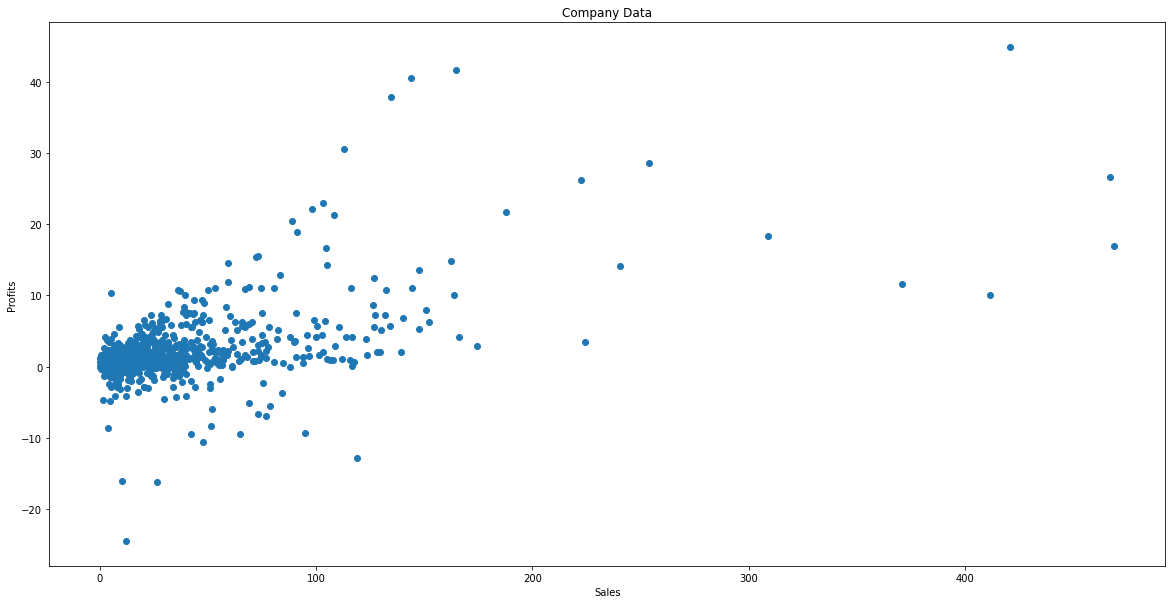

In [134]:
plt.figure(figsize=(20,10))
plt.scatter(df['Sales'],df['Profits'])
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.title('Company Data')

In [140]:
X = df.iloc[:, [1,2]].values
X

array([[ 1.348e+02,  3.780e+01],
       [ 1.131e+02,  3.060e+01],
       [ 1.082e+02,  2.130e+01],
       ...,
       [ 9.000e-01,  7.000e-01],
       [ 2.400e+00,  2.000e-01],
       [ 5.000e+00, -1.000e-01]])

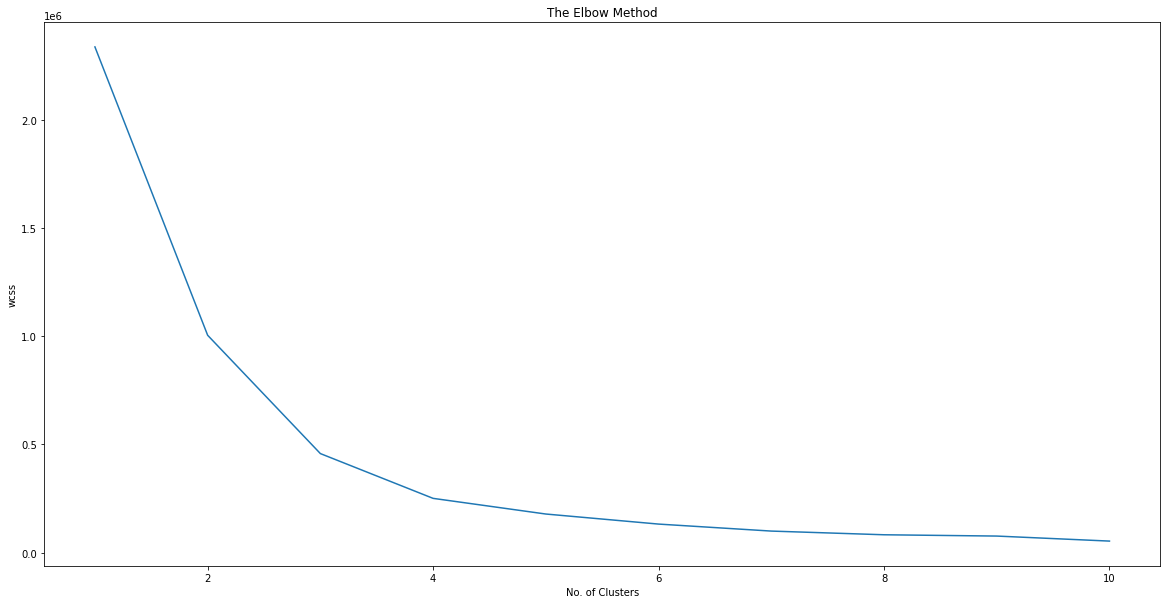

In [141]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
    
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [142]:
kmeans= KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(X)
pred = kmeans.predict(X)
pred

array([1, 1, 4, ..., 3, 3, 3])

In [143]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster:\n', df['Cluster'].value_counts())
df

Number of data points in each cluster:
 3    1471
0     307
4     101
1      39
2       6
Name: Cluster, dtype: int64


,Company,Sales,Profits,Cluster
0,ICBC,134.8,37.8,1
1,China Construction Bank,113.1,30.6,1
2,JPMorgan Chase,108.2,21.3,4
3,General Electric,147.4,13.6,1
4,Exxon Mobil,420.7,44.9,2
...,...,...,...,...
1919,Tractor Supply,4.7,0.3,3
1920,San-Ai Oil,0.5,0.1,3
1921,UOL Group,0.9,0.7,3
1922,Interconexion Electrica,2.4,0.2,3


Text(0.5, 1.0, 'Company Clusters')

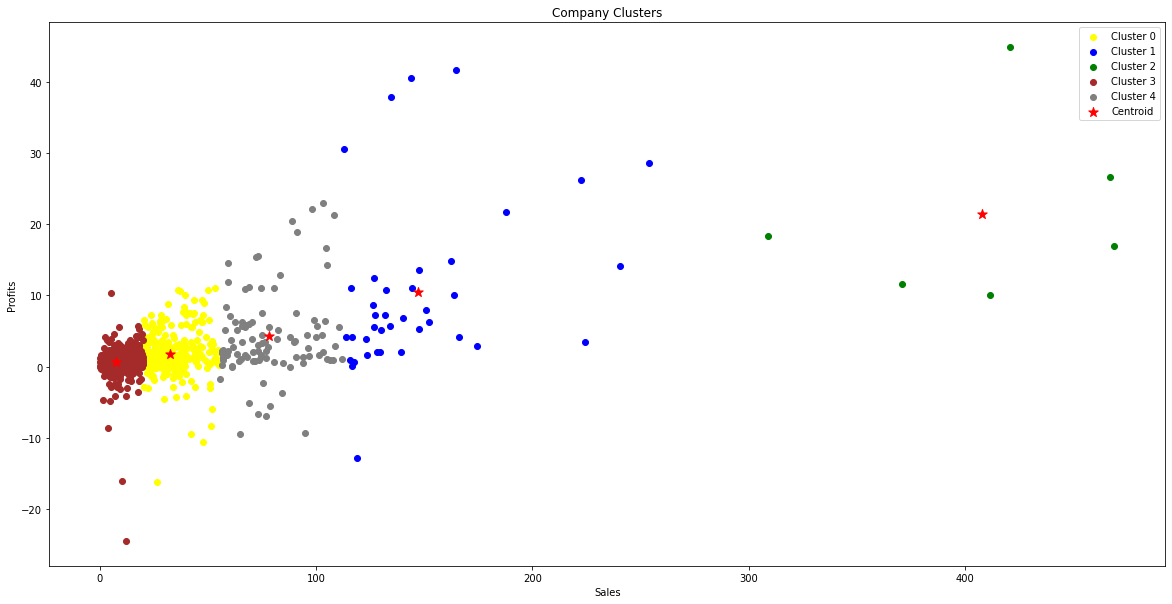

In [139]:
plt.figure(figsize=(20,10))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'yellow', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'brown', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'grey', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 100, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Sales')
plt.ylabel('Profits')
plt.legend()
plt.title('Company Clusters')